In [1]:
pkgs <- c("keras", "lime", "tidyquant", "rsample", "recipes", "yardstick", "corrr", "xgboost", "caret", "e1071", "mltools","skimr")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘listenv’, ‘parallelly’, ‘diagram’, ‘lava’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘shape’, ‘quadprog’, ‘zoo’, ‘plotly’, ‘padr’, ‘anytime’, ‘forecast’, ‘tsfeatures’, ‘future’, ‘globals’, ‘warp’, ‘prodlim’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’, ‘iterators’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’, ‘glmnet’, ‘Rcpp’, ‘assertthat’, ‘gower’, ‘RcppEigen’, ‘PerformanceAnalytics’, ‘quantmod’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘TTR’, ‘xts’, ‘furrr’, ‘slider’, ‘clock’, ‘hardhat’, ‘ipred’, ‘ggrepel’, ‘seriation’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘reshape2’, ‘proxy’




In [2]:
library(keras)
library(lime)
library(tidyquant)
library(rsample)
library(recipes)
library(yardstick)
library(corrr)
library(dplyr)
library(xgboost)
library(caret)  
library(e1071) 
library(purrr)
library(data.table)
library(mltools)
library(skimr)


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: dplyr


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) th

In [3]:
dataset <- read.csv(url("https://raw.githubusercontent.com/mikejbanks/UCI-Machine-Learning-Repository-Bank-Marketing/main/bank-full.csv"), header=TRUE, na.strings=c("", "NA"), sep = ";",stringsAsFactors=TRUE)

In importing the dataset, I have converted blanks to NAs, so I will not need to be concerned about them

In [4]:
dataset

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


In [5]:
sapply(dataset, function(x)all(is.na(x)))

age       job   marital education   default   balance   housing      loan 
    FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
    FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE 
        y 
    FALSE

In [6]:
glimpse(dataset)

Rows: 45,211
Columns: 17
$ age       <int> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57, …
$ job       <fct> management, technician, entrepreneur, blue-collar, unknown, …
$ marital   <fct> married, single, married, married, single, married, single, …
$ education <fct> tertiary, secondary, secondary, unknown, unknown, tertiary, …
$ default   <fct> no, no, no, no, no, no, no, yes, no, no, no, no, no, no, no,…
$ balance   <int> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71…
$ housing   <fct> yes, yes, yes, yes, no, yes, yes, yes, yes, yes, yes, yes, y…
$ loan      <fct> no, no, yes, no, no, no, yes, no, no, no, no, no, no, no, no…
$ contact   <fct> unknown, unknown, unknown, unknown, unknown, unknown, unknow…
$ day       <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ month     <fct> may, may, may, may, may, may, may, may, may, may, may, may, …
$ duration  <int> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517,…
$ campaign  <in

In [7]:

dataset %>% 
        map(is.na) %>%
        map(sum)

$age
[1] 0

$job
[1] 0

$marital
[1] 0

$education
[1] 0

$default
[1] 0

$balance
[1] 0

$housing
[1] 0

$loan
[1] 0

$contact
[1] 0

$day
[1] 0

$month
[1] 0

$duration
[1] 0

$campaign
[1] 0

$pdays
[1] 0

$previous
[1] 0

$poutcome
[1] 0

$y
[1] 0

Since there are no NAs in dataset, I can move forward

In [8]:
sum(duplicated(dataset))

[1] 0

There are no duplicate rows that need to be removed

In [9]:
balanceOutliers <- subset(dataset, balance < -4000)  

In [10]:
balanceOutliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
12910,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15683,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
38737,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no


Even though a balance for an account can be negative, I want to remove any strange outliers, so I will remove rows with balance less than -4000

In [11]:
dataset<-subset(dataset, balance > -4000) 

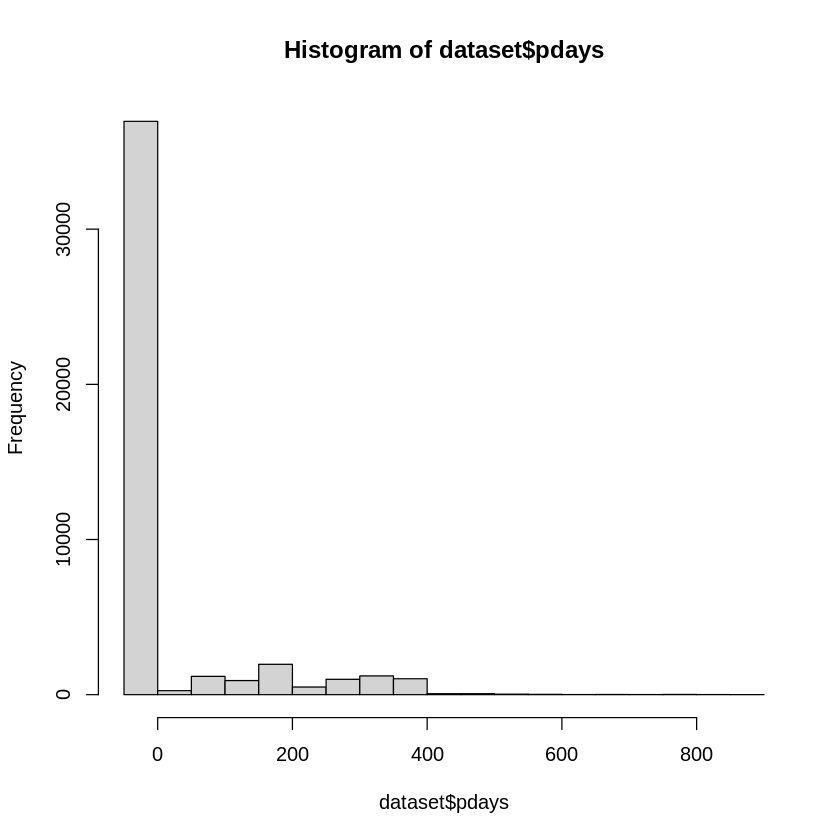

In [12]:
hist(dataset$pdays)

In [13]:
dataset$pdays[dataset$pdays == -1] <- 0

In [14]:
glimpse(dataset)

Rows: 45,208
Columns: 17
$ age       <int> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57, …
$ job       <fct> management, technician, entrepreneur, blue-collar, unknown, …
$ marital   <fct> married, single, married, married, single, married, single, …
$ education <fct> tertiary, secondary, secondary, unknown, unknown, tertiary, …
$ default   <fct> no, no, no, no, no, no, no, yes, no, no, no, no, no, no, no,…
$ balance   <int> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71…
$ housing   <fct> yes, yes, yes, yes, no, yes, yes, yes, yes, yes, yes, yes, y…
$ loan      <fct> no, no, yes, no, no, no, yes, no, no, no, no, no, no, no, no…
$ contact   <fct> unknown, unknown, unknown, unknown, unknown, unknown, unknow…
$ day       <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ month     <fct> may, may, may, may, may, may, may, may, may, may, may, may, …
$ duration  <int> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517,…
$ campaign  <in

pdays column had a large amount of -1 values meaning the client was not previously contacted. I changed the -1 values to 0 for better results

In [15]:
dataset$default<-ifelse(dataset$default=="yes",1,0)

In [16]:
dataset$housing<-ifelse(dataset$housing=="yes",1,0)

In [17]:
dataset$loan<-ifelse(dataset$loan=="yes",1,0)

In [18]:
dataset$y<-ifelse(dataset$y=="yes",1,0)

Changed "yes/no" to binary for default, housing, and loan features and for the target


In [19]:
dataset2 <- as.data.table(dataset)
dataset3<-one_hot(dataset2,cols = "auto")

In [20]:
dataset4<-as.data.frame(dataset3)
minmax <- function(x){(x-min(x))/(max(x)-min(x))}
dataset4[c("previous","age","balance","day","duration","campaign","pdays")] <- lapply(dataset4[c("previous","age","balance","day","duration","campaign","pdays")], minmax)

Scaled Features

In [21]:
sample <- sample(c(TRUE, FALSE), nrow(dataset4), replace=TRUE, prob=c(0.7,0.3))
train  <- dataset4[sample, ]
test   <- dataset4[!sample, ]

In [22]:
train

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,⋯,month_sep,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
2,0.33766234,0,0,0,0,0,0,0,0,0,⋯,0,0.030703538,0.00000000,0,0,0,0,0,1,0
3,0.19480519,0,0,1,0,0,0,0,0,0,⋯,0,0.015453436,0.00000000,0,0,0,0,0,1,0
4,0.37662338,0,1,0,0,0,0,0,0,0,⋯,0,0.018706791,0.00000000,0,0,0,0,0,1,0
6,0.22077922,0,0,0,0,1,0,0,0,0,⋯,0,0.028263522,0.00000000,0,0,0,0,0,1,0
7,0.12987013,0,0,0,0,1,0,0,0,0,⋯,0,0.044123627,0.00000000,0,0,0,0,0,1,0
8,0.31168831,0,0,1,0,0,0,0,0,0,⋯,0,0.077267182,0.00000000,0,0,0,0,0,1,0
10,0.32467532,0,0,0,0,0,0,0,0,0,⋯,0,0.011183408,0.00000000,0,0,0,0,0,1,0
11,0.29870130,1,0,0,0,0,0,0,0,0,⋯,0,0.045140301,0.00000000,0,0,0,0,0,1,0
13,0.45454545,0,0,0,0,0,0,0,0,0,⋯,0,0.105124034,0.00000000,0,0,0,0,0,1,0


In [23]:
y_train<-train[c(49)]

In [24]:
train <- train [1: ncol(train)-1 ]

In [25]:
y_test<-test[c(49)]

In [26]:
test <- test [1: ncol(train)-1 ]
test

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,⋯,month_nov,month_oct,month_sep,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,0.51948052,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0.053070354,0.00000000,0,0,0,0,0
5,0.19480519,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.040260268,0.00000000,0,0,0,0,0
9,0.51948052,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0.010166734,0.00000000,0,0,0,0,0
12,0.14285714,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0.027856852,0.00000000,0,0,0,0,0
14,0.51948052,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.014436763,0.00000000,0,0,0,0,0
17,0.35064935,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0.019926800,0.00000000,0,0,0,0,0
18,0.50649351,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0.007726718,0.00000000,0,0,0,0,0
23,0.18181818,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0.032533550,0.00000000,0,0,0,0,0
27,0.27272727,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0.060187068,0.00000000,0,0,0,0,0


In [27]:
xgboost_train = xgb.DMatrix(data=as.matrix(train), label=as.matrix(y_train))
xgboost_test = xgb.DMatrix(data=as.matrix(test), label=as.matrix(y_test))

In [28]:
model <- xgboost(data = xgboost_train,                       
                 max.depth=7,                           
                 nrounds=1500,
                 verbose=0)                              

summary(model) 

               Length  Class              Mode       
handle               1 xgb.Booster.handle externalptr
raw            9244692 -none-             raw        
niter                1 -none-             numeric    
evaluation_log       2 data.table         list       
call                14 -none-             call       
params               2 -none-             list       
callbacks            1 -none-             list       
feature_names       48 -none-             character  
nfeatures            1 -none-             numeric    

In [29]:
colnames(xgboost_test) <- NULL
pred_test = predict(model, xgboost_test, strict_shape = TRUE)
pred_test 

0.3207864,-0.02255564,0.0005544145,0.01583824,-0.01546534,0.006968804,0.01805783,0.01826702,0.01455105,-0.008018344,⋯,0.6444174,-0.02114942,0.7567893,0.4687963,0.9107934,0.4053452,0.5833465,0.00247746,0.3735262,0.3986042


In [30]:
pred_test2 <-  as.numeric(pred_test > 0.5)

In [31]:
confusionMatrix(factor(pred_test2),factor(as.matrix(y_test)))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11376   793
         1   532   817
                                          
               Accuracy : 0.902           
                 95% CI : (0.8968, 0.9069)
    No Information Rate : 0.8809          
    P-Value [Acc > NIR] : 4.248e-15       
                                          
                  Kappa : 0.4977          
                                          
 Mcnemar's Test P-Value : 9.148e-13       
                                          
            Sensitivity : 0.9553          
            Specificity : 0.5075          
         Pos Pred Value : 0.9348          
         Neg Pred Value : 0.6056          
             Prevalence : 0.8809          
         Detection Rate : 0.8415          
   Detection Prevalence : 0.9002          
      Balanced Accuracy : 0.7314          
                                          
       'Positive' Class : 0               
                  

In [32]:
importance_matrix = xgb.importance(colnames(xgboost_train), model = model)
importance_matrix

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
duration,3.202973e-01,3.069665e-01,1.852856e-01
poutcome_success,9.649853e-02,7.523671e-03,3.274476e-03
balance,8.965597e-02,3.360544e-01,1.875073e-01
age,8.950506e-02,7.594533e-02,1.696013e-01
day,7.210597e-02,4.642244e-02,8.977866e-02
pdays,4.614609e-02,6.794311e-02,3.626793e-02
housing,2.602427e-02,5.668037e-03,1.705214e-02
campaign,2.467958e-02,1.852435e-02,3.548039e-02
month_apr,1.791721e-02,5.599447e-03,1.163890e-02


In [33]:
model_bank <- keras_model_sequential()

In [34]:
model_bank %>% 
  layer_dense(input_shape = ncol(train), 
              units = 16, 
              activation = "relu",
              name = "hidden1",
              kernel_initializer = "uniform") %>%
  
  layer_dropout(rate = 0.001) %>%
  
  layer_dense(units = 16, 
              activation = "relu", 
              name = "hidden2",
              kernel_initializer = "uniform") %>%
  
  layer_dropout(rate = 0.001)  %>%
  
  layer_dense(units = 1, 
              activation = "sigmoid",
              name = "output",
              kernel_initializer = "uniform")

summary(model_bank)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 hidden1 (Dense)                    (None, 16)                      784         
 dropout_1 (Dropout)                (None, 16)                      0           
 hidden2 (Dense)                    (None, 16)                      272         
 dropout (Dropout)                  (None, 16)                      0           
 output (Dense)                     (None, 1)                       17          
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
________________________________________________________________________________


In [35]:
model_bank %>% 
  compile(loss = "binary_crossentropy",
          optimizer = optimizer_adam(learning_rate = 0.001), 
          metrics = "accuracy")


In [36]:
history <- model_bank %>% 
           fit(as.matrix(train),
               as.matrix(y_train),
               epoch = 15,
               validation_split = 0.20)

In [37]:
print(history)


Final epoch (plot to see history):
        loss: 0.1273
    accuracy: 0.9445
    val_loss: 0.7787
val_accuracy: 0.7188 


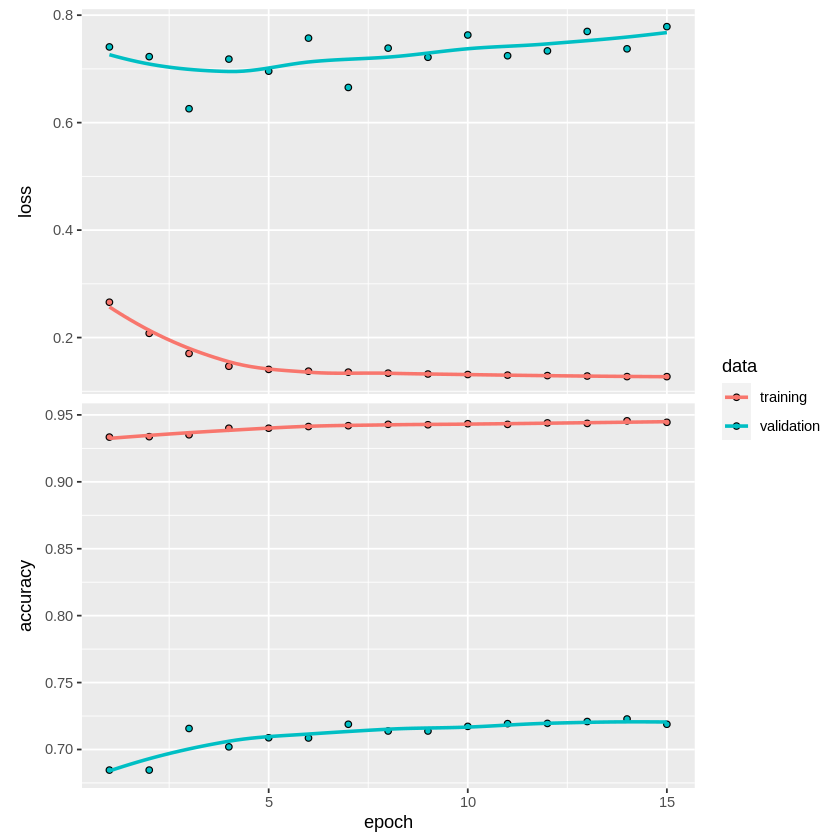

In [38]:
plot(history)

In [43]:
pkgs <- c("DALEX")
install.packages(pkgs)
library("DALEX")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Preparation of a new explainer is initiated
  -> model label       :  Bank NN Model 
  -> data              :  31690  rows  48  cols 
  -> target variable   :  31690  values 
  -> predict function  :  yhat.default will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package Model of class: keras.engine.sequential.Sequential package unrecognized , ver. Unknown , task regression (  default  ) 
  -> predicted values  :  numerical, min =  8.638577e-07 , mean =  0.08994159 , max =  0.6906161  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.6906161 , mean =  0.02615181 , max =  0.9999841  
  A new explainer has been created!  


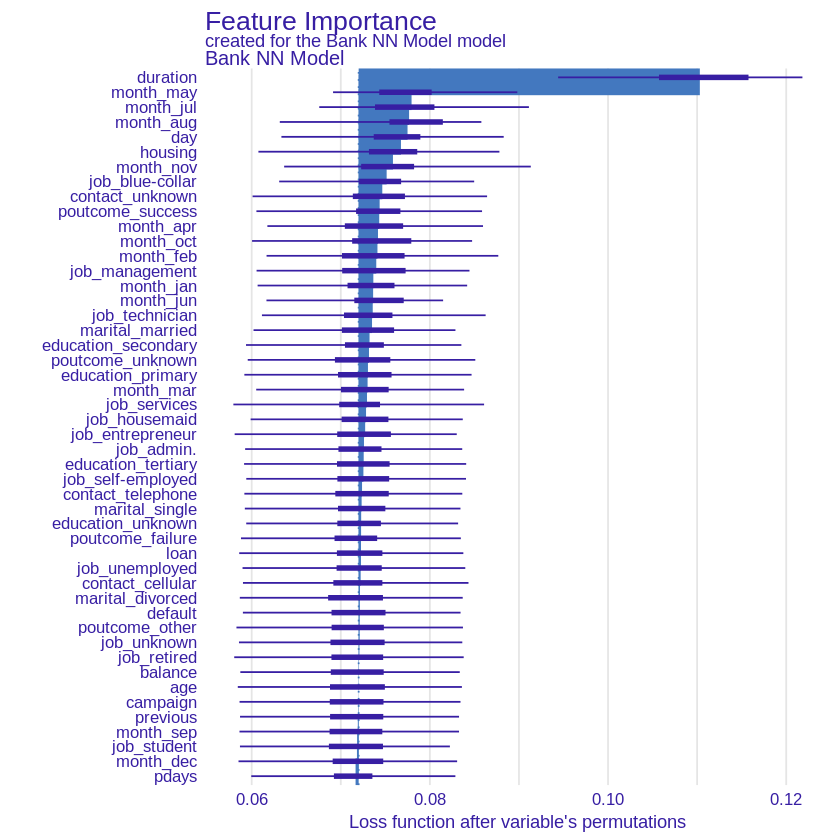

In [44]:
exp_dalex <-
explain(model_bank,
data = as.matrix(train),
y = as.matrix(y_train),
label = "Bank NN Model")
fi_dalex <- model_parts(exp_dalex, B = 20,
loss_function = mse)
plot(fi_dalex)

Preparation of a new explainer is initiated
  -> model label       :  Bank NN Model 
  -> data              :  31690  rows  48  cols 
  -> target variable   :  31690  values 
  -> predict function  :  yhat.default will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package Model of class: keras.engine.sequential.Sequential package unrecognized , ver. Unknown , task regression (  default  ) 
  -> predicted values  :  numerical, min =  8.638577e-07 , mean =  0.08994159 , max =  0.6906161  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.6906161 , mean =  0.02615181 , max =  0.9999841  
  A new explainer has been created!  


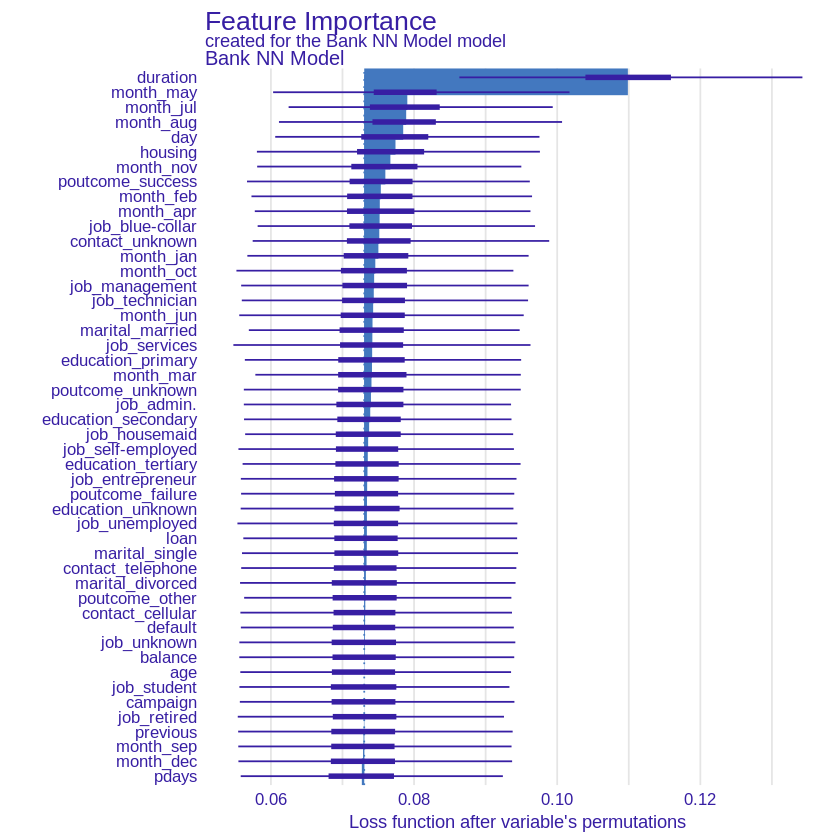

In [45]:
exp_dalex <-
explain(model_bank,
data = as.matrix(train),
y = as.matrix(y_train),
label = "Bank NN Model")
fi_dalex <- model_parts(exp_dalex, B = 500,
loss_function = mse)
plot(fi_dalex)